In [1]:
import os
import numpy as np
from glob import glob
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense

2023-03-03 14:22:06.709044: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 14:22:07.053333: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-03 14:22:07.053427: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-03 14:22:08.649249: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
x = os.listdir('images/carimage')
car_count = len(x)
x = os.listdir('images/notcar')
noncar_count = len(x)

In [3]:
y = np.array([1]*car_count + [0]*noncar_count)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [4]:
img_loc = glob('images/*/*')

In [5]:
x = []
for i in img_loc:
    a = np.asarray(Image.open(i).resize(size=(50,50)))
    x.append(a)
x = np.array(x)
x.shape

(71, 50, 50, 3)

1


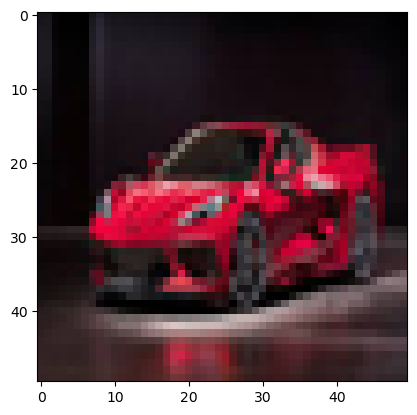

In [6]:
plt.imshow(x[1]);
print(y[1])

In [7]:
x.shape, y.shape

((71, 50, 50, 3), (71,))

In [8]:
model = tf.keras.Sequential([
    Input(shape=(50, 50, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

model.summary()

2023-03-03 14:22:18.042645: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-03 14:22:18.042784: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-03 14:22:18.042908: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (adhiban-Lenovo-ideapad-330S-14IKB-D): /proc/driver/nvidia/version does not exist
2023-03-03 14:22:18.044144: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dropout (Dropout)           (None, 7744)              0

In [9]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((49, 50, 50, 3), (22, 50, 50, 3), (49,), (22,))

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
2/2 [==============================] - 9s 273ms/step - loss: 74.9749 - accuracy: 0.4082
Epoch 2/5
2/2 [==============================] - 1s 209ms/step - loss: 61.1840 - accuracy: 0.6939
Epoch 3/5
2/2 [==============================] - 0s 197ms/step - loss: 18.5043 - accuracy: 0.6939
Epoch 4/5
2/2 [==============================] - 1s 203ms/step - loss: 12.7282 - accuracy: 0.4898
Epoch 5/5
2/2 [==============================] - 1s 182ms/step - loss: 9.9334 - accuracy: 0.5714


In [13]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [14]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 2s 2s/step - loss: 1.7113 - accuracy: 0.7273


[1.7112714052200317, 0.7272727489471436]